## Determine the popularity of a song prior to its release. This is based on popularity of past released songs and their characteristics

This is a continuation of the [previous EDA](https://colab.research.google.com/drive/1IFE7Hq_J26Ge5zMrbBDH5YzP9Dyv9gkX?usp=drive_link) done on the [spotify 1M data](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks) set.


We do a quick recap of the earlier EDA (and some improvements) followed by comparing several techniques aganist the baseline model prepared earlier.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
# from google.colab import drive

# tf.test.gpu_device_name()
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/data/spotify_1M.csv")
# df = pd.read_csv("data/spotify_1M.csv")

# split the data into smaller files for testing the code

# df_1k = df.sample(n=1000, random_state=42)
# df_1k.to_csv('data/spotify_1K.csv', index=False)

# df_10k = df.sample(n=10000, random_state=42)
# df_10k.to_csv('data/spotify_10K.csv', index=False)

# df_40k = df.sample(n=40000, random_state=42)
# df_40k.to_csv('data/spotify_40K.csv', index=False)

# df_100k = df.sample(n=100000, random_state=42)
# df_100k.to_csv('data/spotify_100K.csv', index=False)

In [5]:
# Load Dataset and print basic info

# df = pd.read_csv("data/spotify_1K.csv")
# df = pd.read_csv("data/spotify_40K.csv")
df = pd.read_csv("data/spotify_100K.csv")

print("------- Head -------")
display(df.head())
print("------- Shape -------")
display(df.shape)
print("------- Info -------")
display(df.info())
print("------- Describe -------")
display(df.describe())

# there aren'e many columns with missing values, so we can ignore that part

print("------- Drop Duplicates -------")
duplicate_rows_subsequent = df[df.duplicated()]
print(duplicate_rows_subsequent)
# df = df.drop_duplicates()


------- Head -------


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1054304,Cabas,Amor De Mis Amores,3FTqjWmL21xi4HTTOq94EQ,38,2006,alt-rock,0.725,0.553,6,-6.319,0,0.0340,0.276000,0.000007,0.1850,0.729,90.009,206653,4
1,621408,Ketil Bjørnstad,Første sang,0Pt7ESPgrdTdaxp2f29hX2,11,2023,swedish,0.277,0.164,9,-16.743,0,0.0373,0.878000,0.000181,0.3350,0.184,89.308,459733,4
2,1121669,Project 86,Evil (A Chorus Of Resistance),75Ub3ckaoTdzgH9Azeu8cY,38,2007,alt-rock,0.486,0.927,2,-4.845,0,0.0428,0.000003,0.014500,0.0952,0.377,135.540,183373,4
3,439351,Ital Tek,Open Heart,5WEPna9GWi0NkqVLAkEKNN,18,2020,dubstep,0.411,0.442,1,-12.745,0,0.0270,0.485000,0.926000,0.1910,0.172,174.019,347610,3
4,266036,I-Roy,Irie Right,6peHySxvmZaRF9YEwUsggq,18,2017,dancehall,0.748,0.660,10,-4.648,0,0.2710,0.125000,0.000000,0.0783,0.400,75.583,196179,4


------- Shape -------


(100000, 20)

------- Info -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        100000 non-null  int64  
 1   artist_name       100000 non-null  object 
 2   track_name        100000 non-null  object 
 3   track_id          100000 non-null  object 
 4   popularity        100000 non-null  int64  
 5   year              100000 non-null  int64  
 6   genre             100000 non-null  object 
 7   danceability      100000 non-null  float64
 8   energy            100000 non-null  float64
 9   key               100000 non-null  int64  
 10  loudness          100000 non-null  float64
 11  mode              100000 non-null  int64  
 12  speechiness       100000 non-null  float64
 13  acousticness      100000 non-null  float64
 14  instrumentalness  100000 non-null  float64
 15  liveness          100000 non-null  float64
 16  

None

------- Describe -------


,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,6.589289e+05,18.53810,2011.997890,0.538501,0.639926,5.288470,-8.960420,0.637210,0.092999,0.321203,0.250514,0.223214,0.456931,121.357131,2.485470e+05,3.885080
std,4.283741e+05,15.93253,6.798005,0.183760,0.269552,3.552405,5.643217,0.480807,0.126953,0.353851,0.364292,0.201325,0.268705,29.854491,1.450150e+05,0.469995
min,2.000000e+00,0.00000,2000.000000,0.000000,0.000000,0.000000,-52.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+03,0.000000
25%,2.915808e+05,5.00000,2006.000000,0.415000,0.453000,2.000000,-10.814000,0.000000,0.037100,0.006700,0.000001,0.097900,0.228000,98.605750,1.807330e+05,4.000000
50%,5.774625e+05,15.00000,2012.000000,0.551000,0.694000,5.000000,-7.448000,1.000000,0.050700,0.149000,0.001590,0.134000,0.439000,121.646500,2.250980e+05,4.000000
75%,1.032490e+06,29.00000,2018.000000,0.677000,0.872000,8.000000,-5.277000,1.000000,0.089400,0.638000,0.605000,0.292000,0.676000,139.909000,2.859470e+05,4.000000
max,1.473394e+06,93.00000,2023.000000,0.992000,1.000000,11.000000,2.508000,1.000000,0.967000,0.996000,1.000000,1.000000,0.999000,249.792000,4.852382e+06,5.000000


------- Drop Duplicates -------
Empty DataFrame
Columns: [Unnamed: 0, artist_name, track_name, track_id, popularity, year, genre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature]
Index: []


In [6]:
# convert year to age
from datetime import date

df['age'] = date.today().year - df['year']
df.drop(columns=['year'], inplace=True)

# skipping the distribution plot and correlation map as we had done it earlier

# Drop useless columns
# Unnamed:  0 is just the row id
# track_id is an alias for track_name, so one can be dropped
df = df.drop(columns=['Unnamed: 0', 'track_id'])
display(df.head())

print("------- Final Shape -------")
display(df.shape)


# we also realize that key, mode, time_signature and genre are the categorical features that can be used for the model analysis

,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,age
0,Cabas,Amor De Mis Amores,38,alt-rock,0.725,0.553,6,-6.319,0,0.0340,0.276000,0.000007,0.1850,0.729,90.009,206653,4,19
1,Ketil Bjørnstad,Første sang,11,swedish,0.277,0.164,9,-16.743,0,0.0373,0.878000,0.000181,0.3350,0.184,89.308,459733,4,2
2,Project 86,Evil (A Chorus Of Resistance),38,alt-rock,0.486,0.927,2,-4.845,0,0.0428,0.000003,0.014500,0.0952,0.377,135.540,183373,4,18
3,Ital Tek,Open Heart,18,dubstep,0.411,0.442,1,-12.745,0,0.0270,0.485000,0.926000,0.1910,0.172,174.019,347610,3,5
4,I-Roy,Irie Right,18,dancehall,0.748,0.660,10,-4.648,0,0.2710,0.125000,0.000000,0.0783,0.400,75.583,196179,4,8


------- Final Shape -------


(100000, 18)

In [7]:
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness',
 'acousticness', 'instrumentalness', 'liveness', 'valence',
 'tempo', 'duration_ms', 'age']

categorical_features = ['genre', 'key', 'mode', 'time_signature']

target_feature = "popularity"

# check how many features we will increase during OHE
# and if this differnce will cause any impact on the model capability
for col in categorical_features:
    print(f"{col}: {df[col].unique()} --> {df[col].value_counts().count()}")

genre: ['alt-rock' 'swedish' 'dubstep' 'dancehall' 'gospel' 'techno' 'german'
 'classical' 'groove' 'goth' 'acoustic' 'blues' 'guitar' 'grindcore'
 'rock-n-roll' 'hardstyle' 'progressive-house' 'dub' 'death-metal' 'disco'
 'industrial' 'spanish' 'indian' 'minimal-techno' 'sleep' 'breakbeat'
 'tango' 'show-tunes' 'chill' 'forro' 'comedy' 'piano' 'ambient' 'salsa'
 'edm' 'emo' 'black-metal' 'ska' 'pop' 'samba' 'dance' 'deep-house' 'folk'
 'funk' 'romance' 'opera' 'party' 'house' 'psych-rock' 'new-age'
 'singer-songwriter' 'sertanejo' 'k-pop' 'chicago-house' 'power-pop' 'sad'
 'garage' 'country' 'hip-hop' 'jazz' 'hard-rock' 'trance' 'heavy-metal'
 'drum-and-bass' 'hardcore' 'french' 'club' 'electro' 'punk-rock'
 'afrobeat' 'indie-pop' 'detroit-techno' 'metalcore' 'trip-hop' 'soul'
 'pop-film' 'cantopop' 'rock' 'metal' 'electronic' 'punk' 'songwriter'] --> 82
key: [ 6  9  2  1 10  0  8  7  4  5  3 11] --> 12
mode: [0 1] --> 2
time_signature: [4 3 1 5 0] --> 5


In [8]:
# genre has 82 variations, OHE is going to create a lot of features for that
# adding this might be too costly on processing without much gain in terms of RMSE

# 1K data set works fine with genre and all the models below.
# however 100K takes forever to complete. Lets drop "genre" and try

categorical_features = ['key', 'mode', 'time_signature']
df = df.drop(columns=['genre'])
print("------- Final Shape -------")
display(df.shape)

------- Final Shape -------


(100000, 17)

In [9]:
# start Model evaluation

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR

In [10]:
# define data structure and methods to be used during evaluation

# holds results of models
results = []

########################################
# prepare data and preprocessor
def prepare_data(isCategorical=False):
  if isCategorical:
    X = df[numerical_features + categorical_features]
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
        ]
    )
  else:
    X = df[numerical_features]
    preprocessor = ColumnTransformer(
      transformers=[
          ("num", StandardScaler(), numerical_features)
      ],
      remainder="drop"
    )

  y = df["popularity"]

  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
  )

  return X, y, X_train, X_test, y_train, y_test, preprocessor

########################################
# fit and predict the model and add the score to results
def evaluate_model(
    name,
    model
):
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    display(pipe.fit(X_train, y_train))
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"R² score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    results.append((name, rmse, r2))

    return pipe

########################################
# cross validate model and add score to results
def cross_validate_model(
    name,
    model
):
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    display(pipe.fit(X_train, y_train))

    scores = cross_validate(
        pipe,
        X,
        y,
        cv=5,
        scoring={
          "rmse": "neg_root_mean_squared_error",
          "r2": "r2"
        },
        n_jobs=-1
    )

    r2 = scores["test_r2"].mean()
    rmse = -scores["test_rmse"].mean()

    print(f"R² score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    results.append((name, rmse, r2))

    return pipe

########################################
# interpret and plot top N coeffs/features
def interpret_coeffs(model, isCoeff=True):

    feature_names = model.named_steps["preprocess"].get_feature_names_out()
    if isCoeff:
        coef = model.named_steps["model"].coef_
    else:
        coef = model.named_steps["model"].feature_importances_

    coef_df = pd.DataFrame({
          "feature": feature_names,
          "coef": coef
    }).sort_values(by="coef", key=abs, ascending=False).head(10)

    print("Top 10 Drivers of Popularity")
    coef_df.plot(x="feature", y="coef", kind="barh", figsize=(8,3))
    plt.show()
    # display(coef_df)

########################################
# print results sorted by RMSE
def print_results():
    results_df = pd.DataFrame(
        results, columns=["Model", "RMSE", "R2"]
    ).sort_values("RMSE")

    print("--------------------- Results ---------------------")
    print(results_df)
    print("---------------------------------------------------")


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age'])])),
                ('model', LinearRegression())])

R² score: 0.170
RMSE: 14.57
Top 10 Drivers of Popularity


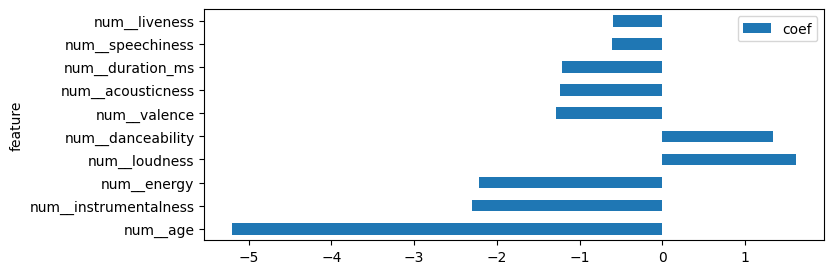

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age'])])),
                ('model', Ridge())])

R² score: 0.170
RMSE: 14.57
Top 10 Drivers of Popularity


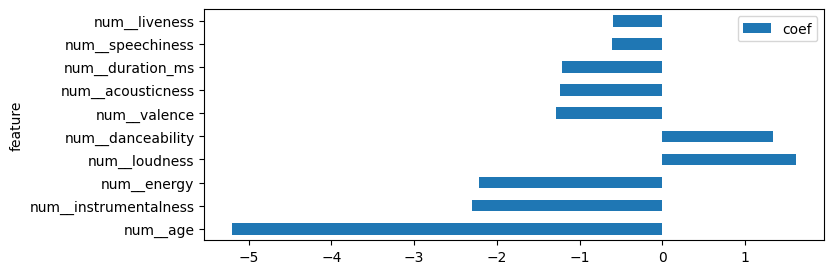

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age'])])),
                ('model', Lasso(alpha=0.01))])

R² score: 0.170
RMSE: 14.57
Top 10 Drivers of Popularity


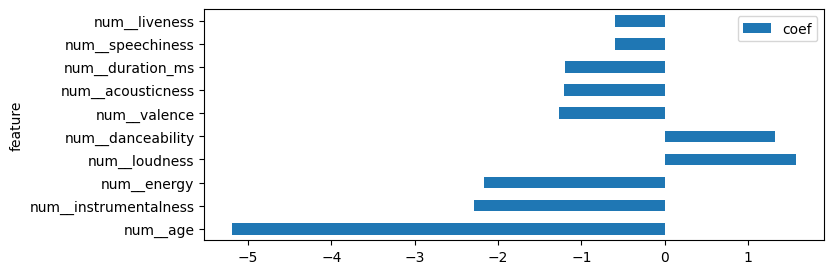

--------------------- Results ---------------------
                  Model       RMSE        R2
0  Linear Reg - Numeric  14.573211  0.169856
1       Ridge - Numeric  14.573211  0.169856
2       LASSO - Numeric  14.573241  0.169853
---------------------------------------------------


In [11]:
# data preparation for Numerical columns only
X, y, X_train, X_test, y_train, y_test, preprocessor = prepare_data()

# Linear/Ridge/Lasso as baseline with numeric features only
pipe = evaluate_model("Linear Reg - Numeric", LinearRegression())
interpret_coeffs(pipe)

pipe = evaluate_model("Ridge - Numeric", Ridge(alpha=1.0))
interpret_coeffs(pipe)

pipe = evaluate_model("LASSO - Numeric", Lasso(alpha=0.01))
interpret_coeffs(pipe)

print_results()

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', LinearRegression())])

R² score: 0.171
RMSE: 14.56
Top 10 Drivers of Popularity


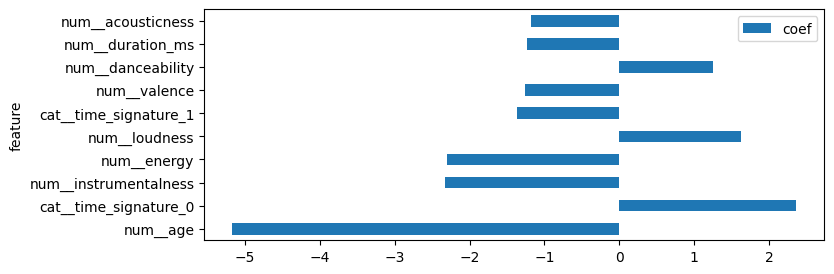

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', Ridge())])

R² score: 0.171
RMSE: 14.56
Top 10 Drivers of Popularity


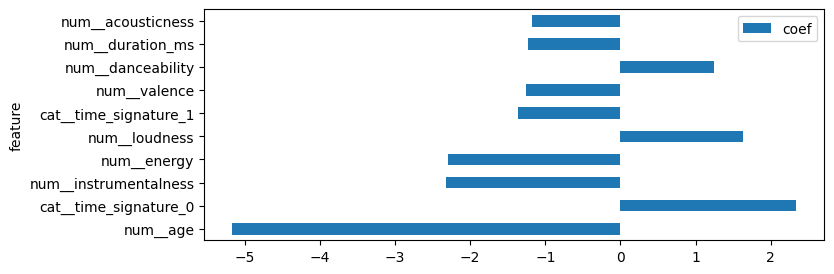

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', Lasso(alpha=0.01))])

R² score: 0.171
RMSE: 14.56
Top 10 Drivers of Popularity


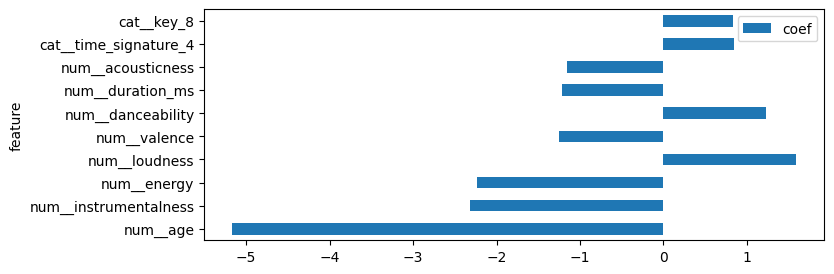

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model',
                 KNeighborsRegressor(n_jobs=-1, n_neighbors=20,
                                     weights='distance'))])

R² score: 0.225
RMSE: 14.08
--------------------- Results ---------------------
                  Model       RMSE        R2
6                   KNN  14.077263  0.225397
5                 LASSO  14.562231  0.171106
4                 Ridge  14.562623  0.171062
3     Linear Regression  14.562633  0.171061
0  Linear Reg - Numeric  14.573211  0.169856
1       Ridge - Numeric  14.573211  0.169856
2       LASSO - Numeric  14.573241  0.169853
---------------------------------------------------


In [12]:
# data preparation for Numerical and categorical columns
X, y, X_train, X_test, y_train, y_test, preprocessor = prepare_data(isCategorical=True)

# Linear/Ride/Lasso/KNN with numeric + categorical
pipe = evaluate_model("Linear Regression", LinearRegression())
interpret_coeffs(pipe)

pipe = evaluate_model("Ridge", Ridge(alpha=1.0))
interpret_coeffs(pipe)

pipe = evaluate_model("LASSO", Lasso(alpha=0.01))
interpret_coeffs(pipe)

pipe = evaluate_model("KNN", KNeighborsRegressor(
    n_neighbors=20,
    weights="distance",
    metric="minkowski",
    p=2,        # Euclidean
    n_jobs=-1
))

print_results()

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

R² score: 0.267
RMSE: 13.69
Top 10 Drivers of Popularity


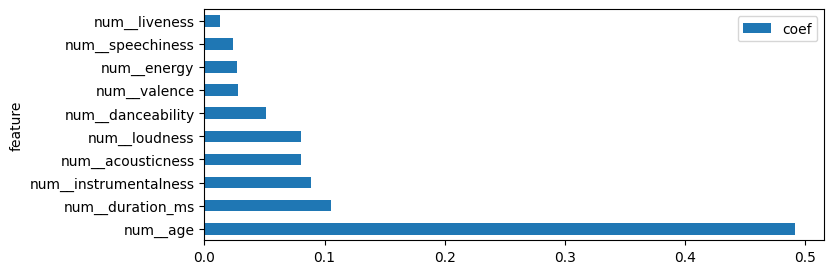

In [13]:
pipe = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42))
interpret_coeffs(pipe, isCoeff=False)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=300,
                                       n_jobs=-1, random_state=42))])

R² score: 0.274
RMSE: 13.62
Top 10 Drivers of Popularity


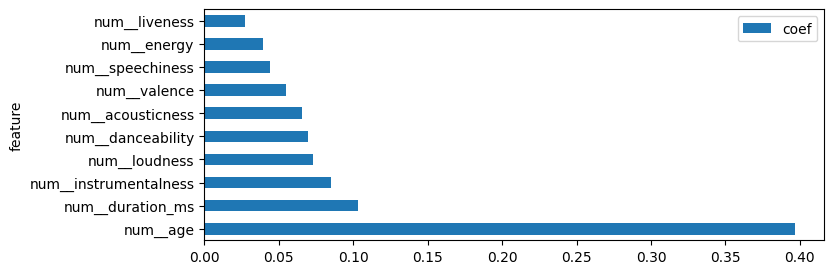

In [14]:
pipe = evaluate_model("Random Forest", RandomForestRegressor(
    n_estimators=300, random_state=42, max_depth=10, n_jobs=-1
))

interpret_coeffs(pipe, isCoeff=False)

In [15]:
pipe = evaluate_model("SVR", SVR(kernel="rbf", C=10, epsilon=0.5))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', SVR(C=10, epsilon=0.5))])

R² score: 0.253
RMSE: 13.83


In [16]:
print_results()

--------------------- Results ---------------------
                  Model       RMSE        R2
8         Random Forest  13.624984  0.274370
7     Gradient Boosting  13.692506  0.267161
9                   SVR  13.826658  0.252730
6                   KNN  14.077263  0.225397
5                 LASSO  14.562231  0.171106
4                 Ridge  14.562623  0.171062
3     Linear Regression  14.562633  0.171061
0  Linear Reg - Numeric  14.573211  0.169856
1       Ridge - Numeric  14.573211  0.169856
2       LASSO - Numeric  14.573241  0.169853
---------------------------------------------------


In [17]:
# cross validate various models

pipe = cross_validate_model("Linear Regression (CV)", LinearRegression())
pipe = cross_validate_model("Ridge (CV)", Ridge(alpha=1.0))
pipe = cross_validate_model("LASSO (CV)", Lasso(alpha=0.01))
pipe = cross_validate_model("KNN (CV)", KNeighborsRegressor(
    n_neighbors=20,
    weights="distance",
    metric="minkowski",
    p=2,        # Euclidean
    n_jobs=-1
))
print_results()

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', LinearRegression())])

R² score: 0.172
RMSE: 14.50


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', Ridge())])

R² score: 0.172
RMSE: 14.50


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', Lasso(alpha=0.01))])

R² score: 0.172
RMSE: 14.50


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model',
                 KNeighborsRegressor(n_jobs=-1, n_neighbors=20,
                                     weights='distance'))])

R² score: 0.221
RMSE: 14.07
--------------------- Results ---------------------
                     Model       RMSE        R2
8            Random Forest  13.624984  0.274370
7        Gradient Boosting  13.692506  0.267161
9                      SVR  13.826658  0.252730
13                KNN (CV)  14.065284  0.220594
6                      KNN  14.077263  0.225397
11              Ridge (CV)  14.497087  0.172006
10  Linear Regression (CV)  14.497088  0.172006
12              LASSO (CV)  14.497517  0.171958
5                    LASSO  14.562231  0.171106
4                    Ridge  14.562623  0.171062
3        Linear Regression  14.562633  0.171061
0     Linear Reg - Numeric  14.573211  0.169856
1          Ridge - Numeric  14.573211  0.169856
2          LASSO - Numeric  14.573241  0.169853
---------------------------------------------------


In [18]:
pipe = cross_validate_model("Gradient Boosting (CV)", GradientBoostingRegressor(random_state=42))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

R² score: 0.267
RMSE: 13.64


In [19]:
pipe = cross_validate_model("Random Forest (CV)", RandomForestRegressor(
    n_estimators=300, random_state=42, max_depth=10, n_jobs=-1
))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=300,
                                       n_jobs=-1, random_state=42))])

R² score: 0.273
RMSE: 13.58


In [20]:
pipe = cross_validate_model("SVR (CV)", SVR(kernel="rbf", C=10, epsilon=0.5))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model', SVR(C=10, epsilon=0.5))])

R² score: 0.250
RMSE: 13.80


In [21]:
print_results()

--------------------- Results ---------------------
                     Model       RMSE        R2
15      Random Forest (CV)  13.581417  0.273287
8            Random Forest  13.624984  0.274370
14  Gradient Boosting (CV)  13.644616  0.266524
7        Gradient Boosting  13.692506  0.267161
16                SVR (CV)  13.795548  0.250204
9                      SVR  13.826658  0.252730
13                KNN (CV)  14.065284  0.220594
6                      KNN  14.077263  0.225397
11              Ridge (CV)  14.497087  0.172006
10  Linear Regression (CV)  14.497088  0.172006
12              LASSO (CV)  14.497517  0.171958
5                    LASSO  14.562231  0.171106
4                    Ridge  14.562623  0.171062
3        Linear Regression  14.562633  0.171061
0     Linear Reg - Numeric  14.573211  0.169856
1          Ridge - Numeric  14.573211  0.169856
2          LASSO - Numeric  14.573241  0.169853
---------------------------------------------------


In [22]:
# ensemble techniques
base_models = [
    ("ridge", Ridge(alpha=1.0)),
    ("svr", SVR(C=10, epsilon=0.2)),
    ("rf", RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    )),
    ("gb", GradientBoostingRegressor(random_state=42))
]

In [23]:
# Voting Regressor (Averaging Ensemble)
pipe = evaluate_model("Voting Regressor", VotingRegressor(
    estimators=base_models
))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('model',
                 VotingRegressor(estimators=[('ridge', Ridge()),
                                             ('svr', SVR(C=10, epsilon=0.2)),
                                             ('rf',
                                              RandomForestRegressor(n_estimators=200,
                                                                    n_jobs=-1,
                                                                    random_state=42)),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42))]))])

R² score: 0.280
RMSE: 13.57
--------------------- Results ---------------------
                     Model       RMSE        R2
17        Voting Regressor  13.573936  0.279798
15      Random Forest (CV)  13.581417  0.273287
8            Random Forest  13.624984  0.274370
14  Gradient Boosting (CV)  13.644616  0.266524
7        Gradient Boosting  13.692506  0.267161
16                SVR (CV)  13.795548  0.250204
9                      SVR  13.826658  0.252730
13                KNN (CV)  14.065284  0.220594
6                      KNN  14.077263  0.225397
11              Ridge (CV)  14.497087  0.172006
10  Linear Regression (CV)  14.497088  0.172006
12              LASSO (CV)  14.497517  0.171958
5                    LASSO  14.562231  0.171106
4                    Ridge  14.562623  0.171062
3        Linear Regression  14.562633  0.171061
0     Linear Reg - Numeric  14.573211  0.169856
1          Ridge - Numeric  14.573211  0.169856
2          LASSO - Numeric  14.573241  0.169853
--------

In [ ]:
# Stacking Regressor (Meta-Learning)
pipe = evaluate_model("Stacking Regressor", StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(alpha=0.5),
    passthrough=False
))

In [1]:
print_results()

NameError: name 'print_results' is not defined

In [2]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2"]).set_index("Model")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# RMSE plot
results_df["RMSE"].plot(
    kind="bar", ax=axes[0], title="RMSE Comparison", legend=False
)
axes[0].set_ylabel("RMSE")

# R2 plot
results_df["R2"].plot(
    kind="bar", ax=axes[1], title="R² Comparison", legend=False
)
axes[1].set_ylabel("R²")

plt.tight_layout()
plt.show()

# Lower RMSE → better predictive accuracy

NameError: name 'pd' is not defined